# Project 3

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import numpy as np
from datetime import datetime
from dateutil import tz
import urllib
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statistics as st

## Load in and Extract Data

In [48]:
URL = 'https://raw.githubusercontent.com/shamgold/Project3/master/reducedData.csv'
data = pd.read_csv(URL)

In [49]:
time = data['time']
latitude = data['latitude']
longitude = data['longitude']
magnitude = data['mag']

## Convert Time

In [50]:
newTime = []

for timeString in time:
    convertedTime = datetime.strptime(timeString, '%Y-%m-%dT%H:%M:%S.%fZ')
    newTime.append(convertedTime)

from_zone = tz.tzutc()
to_zone = tz.tzlocal()

for timeVal in newTime:
    timeVal = timeVal.replace(tzinfo=from_zone)
    timeVal = timeVal.astimezone(to_zone)

## Plot Earthquake Magnitude vs Time

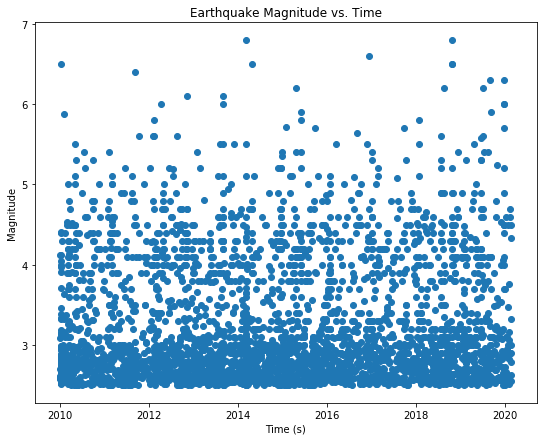

In [51]:
plt.figure(figsize = (9,7))
plt.scatter(newTime, magnitude)
plt.title('Earthquake Magnitude vs. Time')
plt.ylabel('Magnitude')
plt.xlabel('Time (s)')
plt.show()

## Plot Earthquake Locations and Magnitudes on Map

In [52]:
bb = (longitude.min(), longitude.max(), latitude.min(), latitude.max())

In [53]:
def mapPlot(latitude, longitude, magnitude, mapURL):

    image = urllib.request.urlopen(mapURL)
    bbMap = plt.imread(image)
    fig, ax = plt.subplots(figsize = (8,7))
    ax.scatter(longitude, latitude, zorder=1, alpha= 0.2, c='b', s=10)

    for i in range(0, len(magnitude)):

        if(magnitude[i] > 6):
            plt.scatter(longitude[i], latitude[i],  color = 'pink', s = 200)
        elif(magnitude[i] > 5):
            plt.scatter(longitude[i], latitude[i], color = 'hotpink', s = 100)
        elif(magnitude[i] > 4):
            plt.scatter(longitude[i], latitude[i], color = 'orchid', s = 50)
        elif(magnitude[i] > 3):
            plt.scatter(longitude[i], latitude[i], color = 'darkmagenta', s = 25)
        elif(magnitude[i] > 2):
            plt.scatter(longitude[i], latitude[i], color = 'blueviolet', s = 15)
        elif(magnitude[i] > 1):
            plt.scatter(longitude[i], latitude[i], color = 'slateblue', s = 10)

    ax.set_title('Earthquake Locations and Magnitudes')
    ax.set_xlim(bb[0],bb[1])
    ax.set_ylim(bb[2],bb[3])
    ax.imshow(bbMap, zorder=0, extent = bb, aspect= 'equal')

#### Map for Whole Year

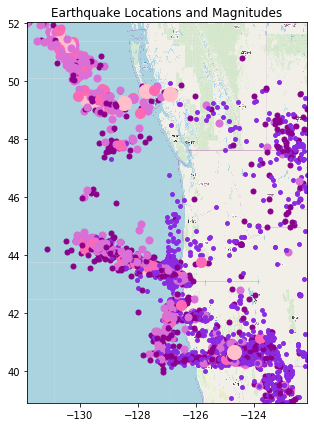

In [54]:
mapPlot(latitude, longitude, magnitude, 'https://github.com/shamgold/Project3/blob/master/map.png?raw=true')

In [55]:
######### Analyze magnitudes for analysis

print(max(magnitude))
print(min(magnitude))
print(st.mean(magnitude))

6.8
2.5
3.2412625189681337


#### Map for April 2015

In [56]:
aprilURL = 'https://raw.githubusercontent.com/shamgold/Project3/master/query-1.csv'
aprilData = pd.read_csv(aprilURL)

aprilLatitude = aprilData['latitude']
aprilLongitude = aprilData['longitude']
aprilMagnitude = aprilData['mag']

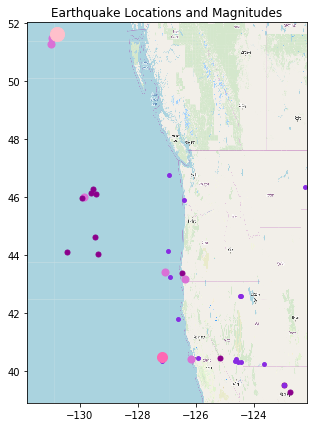

In [57]:
mapPlot(aprilLatitude, aprilLongitude, aprilMagnitude, 'https://github.com/shamgold/Project3/blob/master/map.png?raw=true')

## Repeat for Specific Boundaries

#### Divergent

In [58]:
URL = 'https://raw.githubusercontent.com/shamgold/Project3/master/divergent.csv'
data = pd.read_csv(URL)

In [59]:
time = data['time']
magnitude = data['mag']
latitude = data['latitude']
longitude = data['longitude']

newTime = []

for timeString in time:
    convertedTime = datetime.strptime(timeString, '%Y-%m-%dT%H:%M:%S.%fZ')
    newTime.append(convertedTime)

from_zone = tz.tzutc()
to_zone = tz.tzlocal()

for timeVal in newTime:
    timeVal = timeVal.replace(tzinfo=from_zone)
    timeVal = timeVal.astimezone(to_zone)

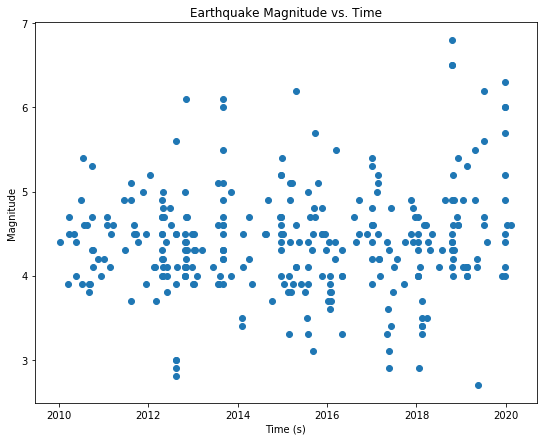

In [60]:
plt.figure(figsize = (9,7))
plt.scatter(newTime, magnitude)
plt.title('Earthquake Magnitude vs. Time')
plt.ylabel('Magnitude')
plt.xlabel('Time (s)')
plt.show()

#### Transform

In [62]:
URL = 'https://raw.githubusercontent.com/shamgold/Project3/master/transform.csv'
data = pd.read_csv(URL)

In [63]:
time = data['time']
magnitude = data['mag']
latitude = data['latitude']
longitude = data['longitude']

newTime = []

for timeString in time:
    convertedTime = datetime.strptime(timeString, '%Y-%m-%dT%H:%M:%S.%fZ')
    newTime.append(convertedTime)

from_zone = tz.tzutc()
to_zone = tz.tzlocal()

for timeVal in newTime:
    timeVal = timeVal.replace(tzinfo=from_zone)
    timeVal = timeVal.astimezone(to_zone)

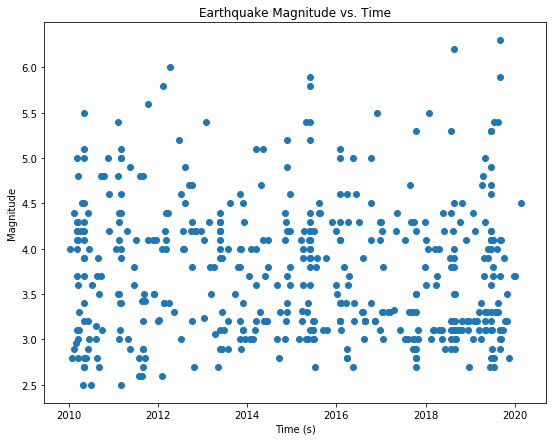

In [64]:
plt.figure(figsize = (9,7))
plt.scatter(newTime, magnitude)
plt.title('Earthquake Magnitude vs. Time')
plt.ylabel('Magnitude')
plt.xlabel('Time (s)')
plt.show()